# Film Industry Performance Data Analysis 

<img src="Images/Boxoffice.jpg" style="width:600px;height:600px">

## Project Goal

This project aims to analyze the best performing type of films in the box office to know which film type the new movie studio of the company should focus on creating.

## Overview

This project analyzes movie performance data from Box Office Mojo, IMDB, Rotten Tomatoes, TheMovie DB and The Numbers that contain the movie ratings of different genres watched across the globe. The data obtained  reflects a blend different films produced over the years and their performances domestically and internationally. Descriptibe analysis of the data shows that the fiml performance varies across different genre of movies. The company can use this analysis to determine best performing type of movies that can be best suited for making to ensure maximum profits are obtained and that they meet both domestic and international standards of the audience.


## 1.Business Problem 

The company, upon seeing all the big companies creating original video content, wants to venture into this industry. They have therefore decided to create a new movie studio, however, they lack the knowledge about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. 

This analysis therefore aims to tackle the main objective which is to identify the best performing type of films that would be suitable for the company to create so as to ensure high revenue and customer satiisfaction. The analysis will consider the following:

1. What is the average rating per genre?

2. What is the gross revenue per film genre? Does it differ based on domestic and foreign gross?

3. What genres are most produced over the years?

These questions are essential in helping the company analyze and evaluate the type of film best suited in terms of revenue earned, customer satisfaction and overall operations reliablity and efficiency as it ventures into this new industry.


## 2.Data Understanding

The data source of this analysis in from files whose data is obtained from the sites Box Office Mojo, IMDB, Rotten Tomatoes, TheMovie DB and The Numbers which contain data on various types of films and their overall performance over the years domestically and internationally.

This analysis focuses on two main files:

a)The 'bom.movie_gross.csv.gz' is a csv file from [Box Office Mojo](https://www.boxofficemojo.com/)  whose dataset contains records(rows) that contain various movies produced over the years.

The features represents details of each movie produced such as the name, year released , studio, domestic and foreign gross.

b)The second file is the 'im.db' from [IMDB](https://www.imdb.com/) which contains 8 tables with various details about each movie. From this dataset the most relevant tables will be the movie_basics and movie_ratings table.

The remaining datasets are useful in cleaning the data of the two relevant datasets. These other datasets are:

The 'rt.movie_info.tsv.gz' & 'rt.reviews.tsv.gz' datasets from [Rotten Tomatoes](https://www.rottentomatoes.com/) 

The 'tmdb.movies.csv.gz' dataset from [TheMovieDB](https://www.themoviedb.org/)

The 'tn.movie_budgets.csv.gz' dataset from [The Numbers](https://www.the-numbers.com/)


The target variables for this analysis will be the average movie rating per genre, the domestic and foreign gross per genre and the most produced genres over the years.

The second dataset of IMBD in the SQLite3 dtabase:

![movie data erd](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-2-project-v3/main/movie_data_erd.jpeg)




## 3.Data Preparation

## Loading the Datasets



In [1]:
#Import the necessary packages
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Loading the Box Office Mojo dataset
df_bom=pd.read_csv('zippedData/bom.movie_gross.csv.gz', encoding='UTF-8')
df_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
df_bom.info()#summary of the datset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
#Loading the IMDB database
#Connect to the Database here('zippedData/im.db')
path = 'zippedData/im.db'
conn= sqlite3.connect(path)

In [5]:
#Checking the tables in database
df_imdb = pd.read_sql(
    """
    SELECT *
    FROM sqlite_master
    """
, conn
)

df_imdb[df_imdb['type'] == 'table']

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [6]:
# loading the other datasets
df_rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')
df_rt_reviews= pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='latin-1')
df_tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')
df_tn_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

### Data Cleaning

To answer the questions for this analysis, the data requires cleaning by conversion of necessary columns into the right data types and cleaning missing values by applying the various methods to drop, replace or keep the values. 


### i) Cleaning the Box Office Mojo dataset
Firstly, we convert the necessary columns into the needed datatype.

In [7]:
#Converting the date column to datetime type
df_bom['year'] = pd.to_datetime(df_bom['year'], format='%Y')
df_bom['year'] = df_bom['year'].dt.year #Extracting the year

In [8]:
#Converting the foreign_gross column into a float
df_bom['foreign_gross'] = df_bom['foreign_gross'].str.replace(',', '').astype(float)
df_bom.dtypes#confirming the right datatypes of each column

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [9]:
#checking for duplicates in the df_bom dataset
df_bom.duplicated().sum()

0

### Missing values

Checking for missing values and evaluating best way to handle them.

In [10]:
df_bom.isna().mean().sort_values(ascending= False)#checking proportion of missing values

foreign_gross     0.398583
domestic_gross    0.008267
studio            0.001476
year              0.000000
title             0.000000
dtype: float64

In [11]:
df_bom.isna().sum()#Checking number of null values per column

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

### Replacing null values
The missing data from the 'studio' column is less than 0.1% hence we can just keep the null values by replacing with 'missing' without much affecting the data.

In [12]:
# dropping rows with missing values in studio column
df_bom['studio'].fillna('missing', inplace=True) 
df_bom.isna().sum()#checking for remaining null values

title                0
studio               0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

### Replace missing values
The missing values in the 'domestic_gross' column are quite informative in analyzing the data, hence the best option would be to replace the null values with the median of the domestic_gross column that least affects our data.



#### a)The 'domestic_gross' column



In [13]:
#replacing the null values in domestic_gross column with the median
df_bom['domestic_gross'].fillna(df_bom['domestic_gross'].median(), inplace=True)
df_bom.isna().sum()#checking for remaining null values

title                0
studio               0
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

#### b) The 'foreign_gross' column

The missing values in the 'foreign_gross' column are quite informative in analyzing the data, hence the best option would be to replace the null values with the  foreign_gross of their respective movies from the other datasets.

The Number movie budgets dataset('df_tn_budgets') contains domestic_gross and worldwide_gross that can be used to fill in the null values in the foreign_gross column of similar movies in our dataset.

In [14]:
df_tn_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')#load dataset
df_tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
df_tn_budgets.info()#summary of the number dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [16]:
#Cleaning and converting the production_budget, domestic_gross and worldwide_gross columns into the right datatype
# Function to clean the columns
def clean_column(col):
    return pd.to_numeric(col.str.replace('$', '').str.replace(',', ''), errors='coerce')#removing dollar sign and commas

# List of columns to clean
numeric_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']

# Apply the cleaning function to each column
for col in numeric_columns:
    df_tn_budgets[col] = clean_column(df_tn_budgets[col])
    
df_tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [17]:
df_tn_budgets.info()#checking that the columns have the right data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


From the Number dataset we get the foreign_gross from the difference of worldwide and domestic gross columns.

In [18]:
# creating new column for foreign gross
df_tn_budgets['foreign_gross'] = (
    df_tn_budgets['worldwide_gross'] - df_tn_budgets['domestic_gross']
)
df_tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365


In [19]:
# Get all the null values of the foreign gross column of the bom dataset
missing_foreign_gross = df_bom[df_bom['foreign_gross'].isna()]['title']

print('Movies missing foreign gross:', len(missing_foreign_gross))

Movies missing foreign gross: 1350


In [20]:
# Select entries from df_tn_budgets that match the missing foreign gross movies
new_foreign_gross = df_tn_budgets[df_tn_budgets['movie'].isin(missing_foreign_gross)][['movie', 'foreign_gross']]

# Rename columns to match bom_df
new_foreign_gross.columns = ['title', 'foreign_gross']

# Filter out rows where foreign_gross is zero
new_foreign_gross = new_foreign_gross[new_foreign_gross['foreign_gross'] != 0]

# Print the count and display the head of the resulting DataFrame
print('Foreign gross entries found in "The Numbers" data:', len(new_foreign_gross))
print(new_foreign_gross.head())

Foreign gross entries found in "The Numbers" data: 151
                   title  foreign_gross
588            Evolution       60030798
946             Rock Dog       14727942
1041  Bullet to the Head       13108140
1231     The Infiltrator        5281296
1290      All Eyez on Me        9954553


We replace the 151 missing data found in the Number dataset.

In [21]:
# Create a dictionary to map titles to foreign gross values
foreign_gross_dict = new_foreign_gross.set_index('title')['foreign_gross'].to_dict()

# Fill missing foreign gross values in df_bom using the dictionary
df_bom['foreign_gross'] = df_bom.apply(lambda row: foreign_gross_dict.get(row['title'], row['foreign_gross']), axis=1)

df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   2187 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [22]:
# Replace reminder null values with the foreign_gross median
df_bom['foreign_gross'].fillna(df_bom['foreign_gross'].median(), inplace=True)

# check for any missing values left
df_bom.foreign_gross.isna().sum()

0

### Cleaning IMDB dataset

From the second database, we pick the two most relevant tables and clean the data.


In [23]:
#Checking the tables in database
df_imdb = pd.read_sql(
    """
    SELECT name
    FROM sqlite_master
    WHERE type= 'table';
    """, conn)
df_imdb

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


#### i) Movie_basics table

In [24]:
# Loading data from movie_basics table
movie_basics=pd.read_sql(
    """
    SELECT *
    FROM movie_basics;
    """
, conn
) 
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [25]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [26]:
#checking for duplicates in the table
movie_basics.duplicated().sum()

0

In [27]:
#checking for null values
movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

We clean the missing values in the three notable columns.

##### a) Original_title
The null values in this column are quite few, hence suitable to replace with missing to reduce effect on the data.

In [28]:
#replace null values with the string 'missing'
movie_basics['original_title'].fillna('missing', inplace=True)
#checking for any remaining missing values
movie_basics['original_title'].isna().sum()

0

##### b) Runtime_minutes 

In [29]:
#replace null values with 0
movie_basics['runtime_minutes'].fillna(0, inplace=True)
#Checking for any remaining null values
movie_basics['runtime_minutes'].isna().sum()

0

##### c) Genre column

As this column is quite crucial for our analysis, the best suited method would be to replace the null values with the string 'missing' which least affects the integrity of our data.

In [30]:
#replace null values with the string 'missing'
movie_basics['genres'].fillna('missing', inplace=True)
#Checking for any remaining null values
movie_basics['genres'].isna().sum()

0

#### ii) Movie_ratings table

In [31]:
# Loading data from movie_ratings table
movie_ratings=pd.read_sql(
    """
    SELECT *
    FROM movie_ratings;
    """
, conn
) 
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [32]:
movie_ratings.info()#summary of the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [33]:
#checking for duplicates
movie_ratings.duplicated().sum()

0

The 'movie_ratings' table has no duplicates or missing values

## 4.Data Analysis

The first step is creating a new dataset that combines all the necessary columns from the various datasets needed for the analysis.

In [34]:
# Merging movie_basics and movie_ratings on movie_id
movies = pd.merge(movie_basics, movie_ratings, on='movie_id')

# Merging the combined movie data with Box Office Mojo data
combined_data = pd.merge(movies, df_bom, left_on='primary_title', right_on='title')

# Extracting relevant columns
combined_data = combined_data[['movie_id', 'title', 'genres', 'averagerating', 'domestic_gross', 'foreign_gross', 'year']]

# Splitting genres into separate rows
combined_data = combined_data.assign(genres=combined_data['genres'].str.split(',')).explode('genres')

combined_data

,movie_id,title,genres,averagerating,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Action,7.1,1100000.0,16200000.0,2016
0,tt0315642,Wazir,Crime,7.1,1100000.0,16200000.0,2016
0,tt0315642,Wazir,Drama,7.1,1100000.0,16200000.0,2016
1,tt0337692,On the Road,Adventure,6.1,744000.0,8000000.0,2012
1,tt0337692,On the Road,Drama,6.1,744000.0,8000000.0,2012
...,...,...,...,...,...,...,...
3024,tt8427036,Helicopter Eela,Drama,5.4,72000.0,16200000.0,2018
3025,tt9078374,Last Letter,Drama,6.4,181000.0,16200000.0,2018
3025,tt9078374,Last Letter,Romance,6.4,181000.0,16200000.0,2018
3026,tt9151704,Burn the Stage: The Movie,Documentary,8.8,4200000.0,16100000.0,2018


### a) Average rating per Genre

Recalling the first question: What is the average rating per genre?

Firstly is getting the average rating of the movie based on each genre. Afterwards is evaluating the genre with the highest average rating.

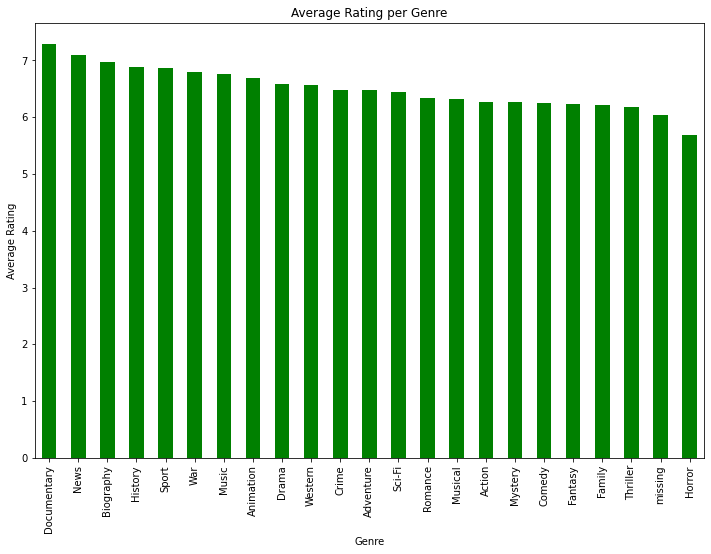

In [35]:
#Grouping by genre to get the mean averagerating for each genre
avg_rating_per_genre = combined_data.groupby('genres')['averagerating'].mean().sort_values(ascending=False)

#Plotting the data
plt.figure(figsize=(12, 8))
avg_rating_per_genre.plot(kind='bar', color='green')

plt.title('Average Rating per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

### b) Gross per Film Genre 
To answer the second question: What is the gross revenue per film genre? Does it differ based on domestic and foreign gross?

First step is finding the average gross from films in each genre afterwhich is evaluation of this based on domestic and foreign gross.

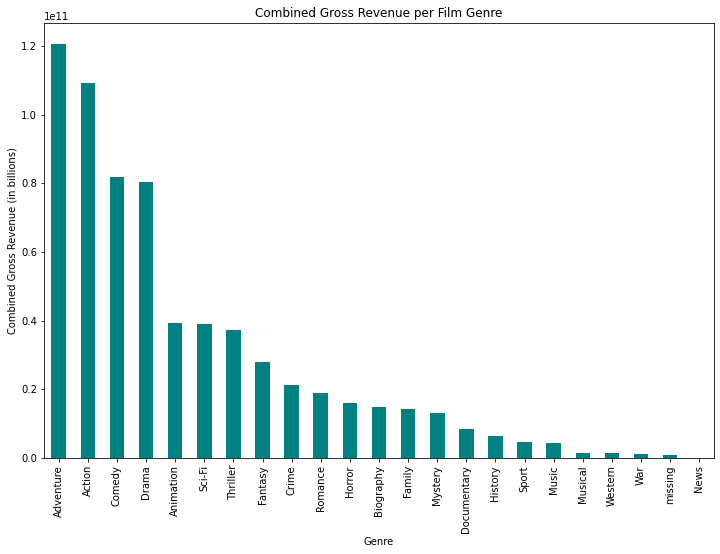

In [36]:
# Add a new column for combined gross revenue
combined_data['combined_gross'] = combined_data['domestic_gross'] + combined_data['foreign_gross']

# Group by genre and sum the combined gross revenue
combined_gross_revenue_per_genre = combined_data.groupby('genres')['combined_gross'].sum().sort_values(ascending=False)

# Plot the combined gross revenue per genre
plt.figure(figsize=(12, 8))
combined_gross_revenue_per_genre.plot(kind='bar', color='teal')
# Customize appearance
plt.title('Combined Gross Revenue per Film Genre')
plt.xlabel('Genre')
plt.ylabel('Combined Gross Revenue (in billions)')
plt.xticks(rotation=90)
plt.show()

Evaluating the best genres based on domestic_gross and foreign_gross.

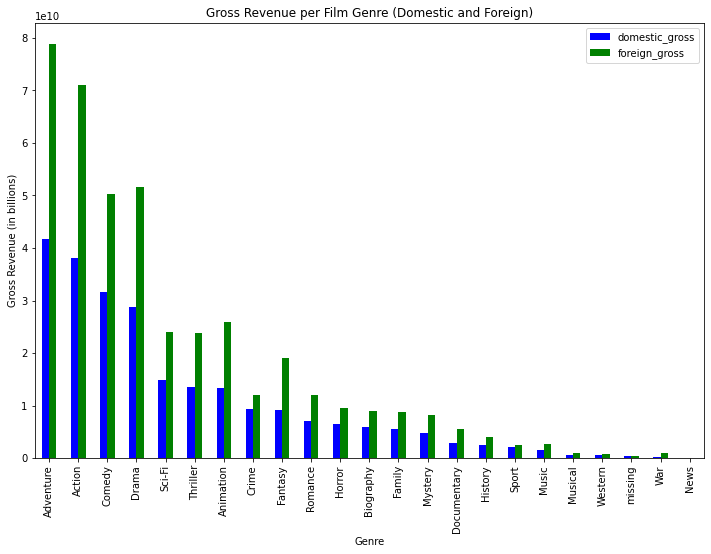

In [37]:
#grouping the data by genre and finding the total of domestic and foreign gross for each genre
gross_revenue_per_genre = combined_data.groupby('genres')[['domestic_gross', 'foreign_gross']].sum().sort_values(by='domestic_gross', ascending=False)

#Plotting the data
gross_revenue_per_genre.plot(kind='bar', stacked=False, figsize=(12, 8), color=['blue', 'green'])

#Customize appearance
plt.title('Gross Revenue per Film Genre (Domestic and Foreign)')
plt.xlabel('Genre')
plt.ylabel('Gross Revenue (in billions)')
plt.xticks(rotation=90)
plt.show()

### c) Most produced genres over the years

The final question of this analysis: What genres are most produced over the years?

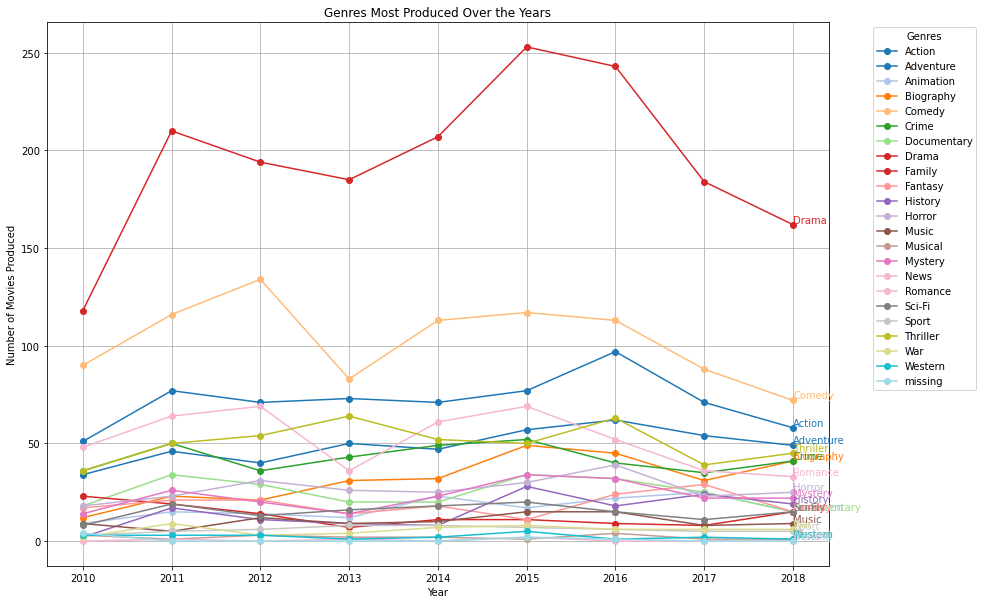

In [38]:
# Calculate the number of movies produced per genre per year
genres_count = combined_data.groupby(['year', 'genres']).size().unstack().fillna(0)
# Define a colormap with a wide range of distinct colors
colormap = plt.get_cmap('tab20')
# Plot the line graph with distinct colors
plt.figure(figsize=(14, 10))
for i, genre in enumerate(genres_count.columns):
    plt.plot(genres_count.index, genres_count[genre], marker='o', color=colormap(i / len(genres_count.columns)), label=genre)
# Label the end of each line
    plt.text(genres_count.index[-1], genres_count[genre].iloc[-1], genre,
             color=colormap(i / len(genres_count.columns)),
             verticalalignment='bottom', horizontalalignment='left')
    
plt.title('Genres Most Produced Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies Produced')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [39]:
combined_data.to_csv('zippedData/CleanCombinedMovieData.csv', index=False)

## 5. Conclusion

This analysis leads to three conclusions and recommendations for the best suited type of film for the company to select:

1.Average Rating per Genre. From the analysis, most of the genres have fairly similar high ratings. However, certain genres consistently receive slightly higher average ratings thus indicating stronger audience satisfaction. Based on the results the top five genres are Documentary, News, Biography, History and Sport. Higher average ratings can suggest better critical reception and audience engagement.

Recommendation: In regards to ratings, the company might focus on producing more films in these genres with higher average ratings to attract a more engaged and satisfied audience and investing in high-quality productions within these genres to maintain or enhance rating levels and build a reputation for quality content.

2.Gross per film Genre. Based on the analysis, some genres generate significantly higher gross revenue, both domestically and internationally. These include, Adventure,Action, Comedy,Drama and Animation films, often have higher gross revenue compared to other genres.
In terms of Domestic and Foreign Performance, most genres seem to perform better in international markets as compared to the domestic markets.

Recommendations: From the results, the company should invest in creating films in the  Adventure,Action, Comedy,Drama and Animation genres which have a high gross revenue potential, especially having a high international performance if aiming for global reach.

3.Most produced genres over the years. In conclusion to the analysis, some genres are produced more frequently than others. For instance, genres like Drama, Action,Comedy, Adventure and Thriller dominate production compared to less common genres. The high production volumes in these genres might indicate  popularity among the audience.

Recommendations: The company should consider producing film in the Drama, Action,Comedy, Adventure and Thriller genres to match up to the current trends that capture the audiences' interest. However, the company should stay updated with industry trends to identify emerging genres or shifts in audience preferences and adjust the production strategy accordingly.

In summary, genres that best suited for the company are Adventure, Action, Comedy and Drama as they all fairly match up to the industry standards in terms of having a high gross and popularly produced. Although the ratings are not the highest in these genres they still show above average ratings in the industry.


## 6. Further Analysis

Further analysis could give more insights on other ways to best select types of films best suited for the company's new movie studio:

1.Analyzing audience demographics. These include age, gender, etc. for different genres. This could provide insights into who is watching which types of films.

2.Analyzing the viewer engagement metrics through tracking sentiments for different genres to gauge viewer engagement and interest.

3.Analysis of Profitability.There should be further analysis to determine the profitability of different genres by comparing production costs against gross revenue to identify which genres are more lucrative.